In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df['target'] = cancer['target']

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='target', ylabel='count'>

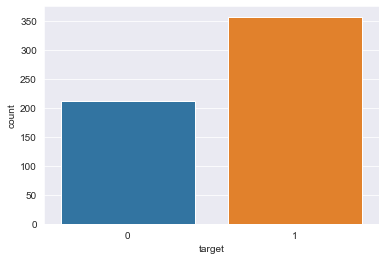

In [10]:
sns.countplot(x = 'target', data = df)

In [13]:
df.corr()['target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

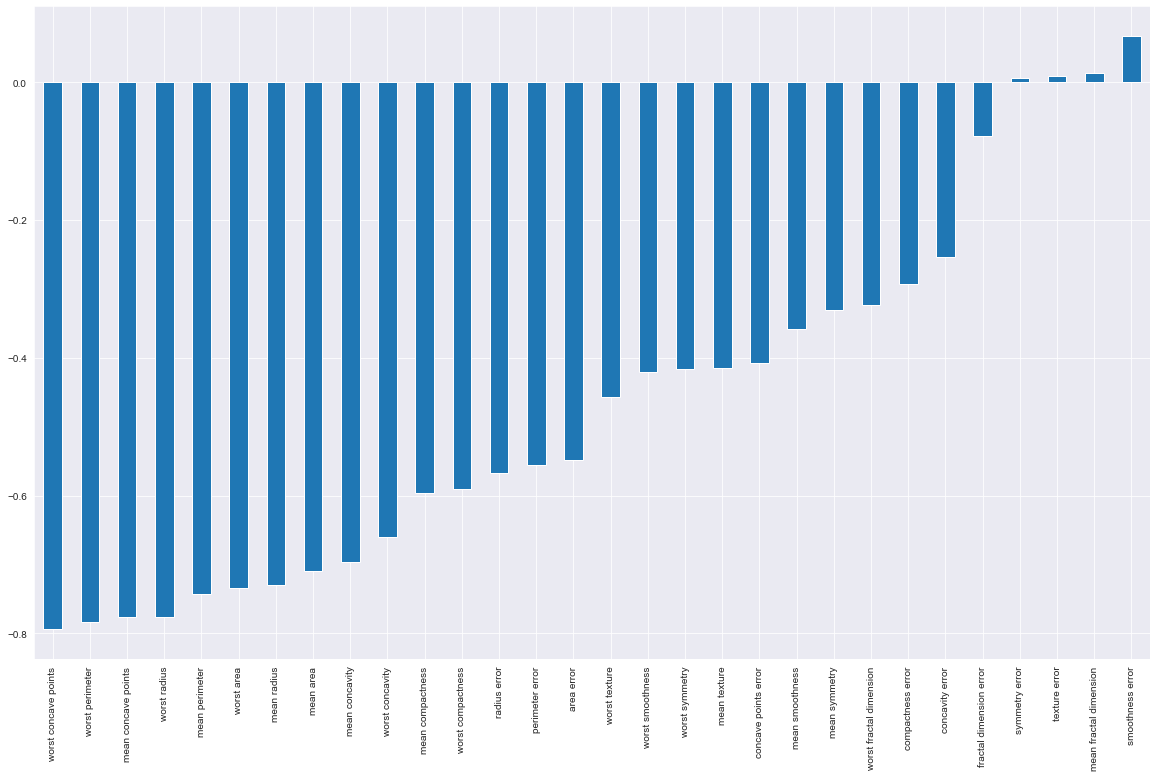

In [17]:
plt.figure(figsize=(20, 12))
df.corr()['target'].sort_values()[:-1].plot(kind = 'bar')

In [18]:
X = df.drop('target', axis = 1).values
y = df['target'].values

In [20]:
X.shape

(569, 30)

In [22]:
y.shape

(569,)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
scaler.fit(X_train)

MinMaxScaler()

In [28]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
X_train.shape

(381, 30)

# Overfitting

In [32]:
model = Sequential()

model.add(Dense(30, activation='relu')) # Input layer

model.add(Dense(15, activation='relu'))
model.add(Dense(7, activation='relu'))

model.add(Dense(1, activation='sigmoid')) # Output layer

model.compile(loss='binary_crossentropy', optimizer='adam')

2022-04-08 16:46:36.167275: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
model.fit(X_train, y_train, epochs = 600, validation_data=(X_test, y_test))

Epoch 1/600
12/12 [==============================] - 2s 31ms/step - loss: 0.6771 - val_loss: 0.6643
Epoch 2/600
12/12 [==============================] - 0s 10ms/step - loss: 0.6574 - val_loss: 0.6404
Epoch 3/600
12/12 [==============================] - 0s 11ms/step - loss: 0.6321 - val_loss: 0.6098
Epoch 4/600
12/12 [==============================] - 0s 9ms/step - loss: 0.6010 - val_loss: 0.5728
Epoch 5/600
12/12 [==============================] - 0s 8ms/step - loss: 0.5630 - val_loss: 0.5300
Epoch 6/600
12/12 [==============================] - 0s 10ms/step - loss: 0.5172 - val_loss: 0.4823
Epoch 7/600
12/12 [==============================] - 0s 12ms/step - loss: 0.4665 - val_loss: 0.4302
Epoch 8/600
12/12 [==============================] - 0s 7ms/step - loss: 0.4134 - val_loss: 0.3770
Epoch 9/600
12/12 [==============================] - 0s 9ms/step - loss: 0.3583 - val_loss: 0.3272
Epoch 10/600
12/12 [==============================] - 0s 16ms/step - loss: 0.3104 - val_loss: 0.2884
Epo

In [34]:
loss_df = pd.DataFrame(model.history.history)

In [35]:
loss_df.head()

,loss,val_loss
0,0.677134,0.664301
1,0.657419,0.640366
2,0.632053,0.609844
3,0.600962,0.572778
4,0.563020,0.529982


<AxesSubplot:>

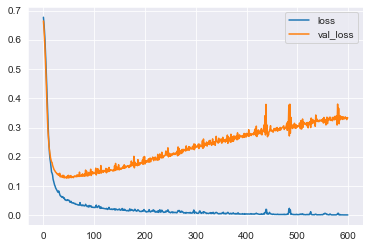

In [36]:
loss_df.plot()